In [1]:
# this script plots the gene age and gene gain and loss p-values of the 4 groups compare to the all DE genes 
# mann whitney is between each grop and the DE group

In [3]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

import math
from math import log
import re
import ast
import scipy
from pandas import Series

import itertools
from collections import defaultdict

import collections

from collections import Counter
import os
#import row_matchers


# the cross with DE here is also FC>0!!!!!!!

In [4]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [5]:

stim_high_col='#88419d'
stim_other_col='#8c97c6'
stim_low_col='#c0d4e6'


unst_high_col='#2b8cbe'
unst_other_col='#7cccc4'
unst_low_col='#ccebc6'


In [6]:
# open the big metadatand leave only 1-1
human_mouse_ortho=pd.read_csv(r"C:\Users\TzachiHNB6\Documents\lilach's paper\fig6\input\1-1_human_mouse_metadata.csv",index_col=0)
human_mouse_ortho_1_1=human_mouse_ortho[human_mouse_ortho['Mouse homology type']=='ortholog_one2one']
human_mouse_ortho_1_1


human_mouse_ortho_1_1.columns

# create 1-1 dict mouse>human ens names 
human_mouse_ortho_1_1_dict=dict(zip(human_mouse_ortho_1_1['Mouse gene stable ID'],human_mouse_ortho_1_1.index))

In [8]:
# define the groups: 

study='Hagai'
species=['homo','mus']
if species==['homo','mus']:
    species_full_names=['Homo sapiens','Mus musculus']
treats=['LF4','PIC4']
    
    


df_groups=pd.read_csv(r"C:\Users\TzachiHNB6\Documents\lilach's paper\fig6\input\{}_{}_vs_{}_{}_and_{}_groups_results.csv".format(study,species[0],species[1],treats[0],treats[1]),index_col=0)
df_groups

DE_genes_FC_values_df=pd.read_csv(r"C:\Users\TzachiHNB6\Documents\lilach's paper\fig6\input\DE_genes_human_mouse_pic.csv",index_col=1)

DE_genes=DE_genes_FC_values_df.index
non_DE_genes=[i for i in human_mouse_ortho_1_1.index] #if i not in DE_genes]

# stim groups - high and low
group_stim_high=df_groups[(df_groups[f'group_{treats[1]}']==f'{treats[1]}_high_strict')|(df_groups[f'group_{treats[1]}']==f'{treats[1]}_high_moderate')]
print(len(group_stim_high.index))
group_stim_high_and_DE=[i for i in group_stim_high.index if i in DE_genes_FC_values_df.index]
print(len(group_stim_high_and_DE))


group_stim_low=df_groups[(df_groups[f'group_{treats[1]}']==f'{treats[1]}_low_strict')|(df_groups[f'group_{treats[1]}']==f'{treats[1]}_low_moderate')]
print(len(group_stim_low.index))
group_stim_low_and_DE=[i for i in group_stim_low.index if i in DE_genes_FC_values_df.index]
print(len(group_stim_low_and_DE))


# unst groups - high and low
group_unst_high=df_groups[(df_groups[f'group_{treats[0]}']==f'{treats[0]}_high_strict')|(df_groups[f'group_{treats[0]}']==f'{treats[0]}_high_moderate')]
print(len(group_unst_high.index))
group_unst_high_and_DE=[i for i in group_unst_high.index if i in DE_genes_FC_values_df.index]
print(len(group_unst_high_and_DE))


group_unst_low=df_groups[(df_groups[f'group_{treats[0]}']==f'{treats[0]}_low_strict')|(df_groups[f'group_{treats[0]}']==f'{treats[0]}_low_moderate')]
print(len(group_unst_low.index))
group_unst_low_and_DE=[i for i in group_unst_low.index if i in DE_genes_FC_values_df.index]
print(len(group_unst_low_and_DE))


579
224
519
166
498
104
476
84


In [9]:
DE_genes_not_in_4_groups=[i for i in DE_genes if (i not in group_stim_high_and_DE) &
                          (i not in group_stim_low_and_DE) &
                          (i not in group_unst_high_and_DE) &
                          (i not in group_unst_low_and_DE)]
len(DE_genes_not_in_4_groups)

901

In [10]:
old_names_to_new_names_dict={'STIM-high':'human constitutive-low',
                             'STIM-low':'mouse constitutive-low',
                             'UNST-high':'mouse constitutive-high',
                             'UNST-low':'human constitutive-high'
                             
                            }


In [ ]:
# p- identity

In [11]:
data_to_plot=pd.DataFrame()


In [14]:
data_to_plot['rest_1_1_orthos']=list(human_mouse_ortho_1_1.loc[[i for i in non_DE_genes if i in human_mouse_ortho_1_1.index]]['p_identity'])

data_to_plot['rest_DE_genes']=list(human_mouse_ortho_1_1.loc[[i for i in DE_genes if i in human_mouse_ortho_1_1.index]]['p_identity'])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in DE_genes if i in human_mouse_ortho_1_1.index]]['p_identity'].index))

data_to_plot[f'{treats[1]}_high']=list(human_mouse_ortho_1_1.loc[[i for i in group_stim_high_and_DE if i in human_mouse_ortho_1_1.index]]['p_identity'])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_stim_high_and_DE if i in human_mouse_ortho_1_1.index]]['p_identity'].index))

data_to_plot[f'{treats[1]}_low']=list(human_mouse_ortho_1_1.loc[[i for i in group_stim_low_and_DE if i in human_mouse_ortho_1_1.index]]['p_identity'])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_stim_low_and_DE if i in human_mouse_ortho_1_1.index]]['p_identity'].index))

data_to_plot[f'{treats[0]}_high']=list(human_mouse_ortho_1_1.loc[[i for i in group_unst_high_and_DE if i in human_mouse_ortho_1_1.index]]['p_identity'])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_unst_high_and_DE if i in human_mouse_ortho_1_1.index]]['p_identity'].index))

data_to_plot[f'{treats[0]}_low']=list(human_mouse_ortho_1_1.loc[[i for i in group_unst_low_and_DE if i in human_mouse_ortho_1_1.index]]['p_identity'])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_unst_low_and_DE if i in human_mouse_ortho_1_1.index]]['p_identity'].index))


data_to_plot

data_to_plot_new=data_to_plot[['rest_1_1_orthos','rest_DE_genes',f'{treats[1]}_high',f'{treats[1]}_low',f'{treats[0]}_high',f'{treats[0]}_low']]

data_to_plot_new

data_to_plot_new.rename(columns={'rest_1_1_orthos':'All_1-1_orthologs','rest_DE_genes':'rest of DE genes','PIC4_high':'STIM-high','PIC4_low':'STIM-low','LF4_high':'UNST-high','LF4_low':'UNST-low' },inplace=True)
data_to_plot_new

print('rest of DE genes')
print(len(data_to_plot_new['rest of DE genes'].dropna()))
print('STIM-high')
print(len(data_to_plot_new['STIM-high'].dropna()))

print('STIM-low')
print(len(data_to_plot_new['STIM-low'].dropna()))

print('UNST-high')
print(len(data_to_plot_new['UNST-high'].dropna()))

print('UNST-low')
print(len(data_to_plot_new['UNST-low'].dropna()))



rest of DE genes
1473
STIM-high
224
STIM-low
166
UNST-high
104
UNST-low
84


C:\Users\TzachiHNB6\AppData\Local\Temp\ipykernel_6100\2738256649.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=['All_1-1_orthologs','DE genes','human \nconstitutive-low','mouse \nconstitutive-low','mouse \nconstitutive-high','human \nconstitutive-high' ])# old: sns.boxplot(data=human_mouse_ortho_1_1,x='group',y='p_identity',order=['rest_1_1_orthos','rest_DE_genes','PIC4_high','PIC4_low','LF4_high','LF4_low'],palette='pastel')


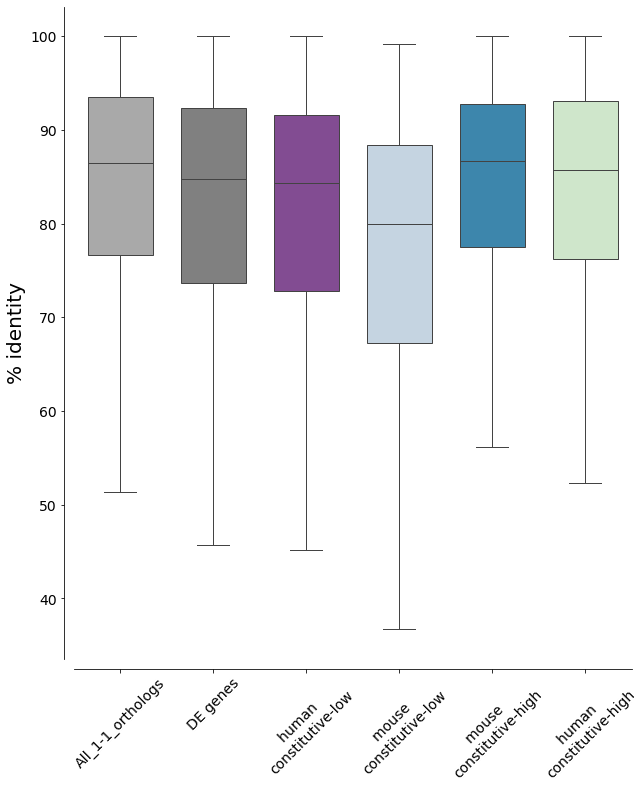

mann DE_PIC_high
MannwhitneyuResult(statistic=166665.0, pvalue=0.4024099042073936)
mann DE_PIC_low
MannwhitneyuResult(statistic=145411.0, pvalue=3.102073905414815e-05)
mann DE_LF_high
MannwhitneyuResult(statistic=68934.0, pvalue=0.9561095263080364)
mann DE_LF_low
MannwhitneyuResult(statistic=59520.0, pvalue=0.7208759859095327)
FDR
[DE_PIC_high, DE_PIC_low, DE_LF_high, DE_LF_low]
[0.4024099042073936, 3.102073905414815e-05, 0.9561095263080364, 0.7208759859095327]
[8.04819808e-01 1.24082956e-04 9.56109526e-01 9.56109526e-01]


In [17]:
data=data_to_plot_new.copy()
fig=plt.figure(figsize=(10,12))

my_pal = { "All_1-1_orthologs": "darkgrey",
    "rest of DE genes": "grey",
              "STIM-high": stim_high_col, "STIM-low": stim_low_col,
          "UNST-high": unst_high_col, "UNST-low": unst_low_col
             }

pvals_for_FDR=[]
order=['All_1-1_orthologs','rest of DE genes','STIM-high','STIM-low','UNST-high','UNST-low']
ax=sns.boxplot(data=data,order=order,palette=my_pal,width=0.7,showfliers = False)
ax.set_xticklabels(labels=['All_1-1_orthologs','DE genes','human \nconstitutive-low','mouse \nconstitutive-low','mouse \nconstitutive-high','human \nconstitutive-high' ])# old: sns.boxplot(data=human_mouse_ortho_1_1,x='group',y='p_identity',order=['rest_1_1_orthos','rest_DE_genes','PIC4_high','PIC4_low','LF4_high','LF4_low'],palette='pastel')
plt.tick_params(axis='y',labelsize =14)

sns.despine(offset=10, trim=False,fig=fig)

plt.tick_params(axis='x', which='both', labelsize=14,labelrotation=45)
plt.ylabel('% identity',fontsize=20)
plt.savefig(r"C:\Users\TzachiHNB6\Documents\lilach's paper\fig6\figures\per_identity.pdf")
plt.savefig(r"C:\Users\TzachiHNB6\Documents\lilach's paper\fig6\figures\per_identity.png")

plt.show()

mann_w=scipy.stats.mannwhitneyu(x=data['rest of DE genes'].dropna(), y=data['STIM-high'].dropna(),alternative='greater')
#mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='PIC4_high']['p_identity'])
print('mann DE_PIC_high')
print(mann_w)
pvals_for_FDR.append(mann_w[1])


mann_w=scipy.stats.mannwhitneyu(x=data['rest of DE genes'].dropna(), y=data['STIM-low'].dropna(),alternative='greater')
#mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='PIC4_low']['p_identity'])
print('mann DE_PIC_low')
print(mann_w)
pvals_for_FDR.append(mann_w[1])



mann_w=scipy.stats.mannwhitneyu(x=data['rest of DE genes'].dropna(), y=data['UNST-high'].dropna(),alternative='greater')
#mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='LF4_high']['p_identity'])
print('mann DE_LF_high')
print(mann_w)
pvals_for_FDR.append(mann_w[1])



mann_w=scipy.stats.mannwhitneyu(x=data['rest of DE genes'].dropna(), y=data['UNST-low'].dropna(),alternative='greater')
#mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='LF4_low']['p_identity'])
print('mann DE_LF_low')
print(mann_w)
pvals_for_FDR.append(mann_w[1])


# when we had the 1-1 orthos inside.... 
####mann_w=scipy.stats.mannwhitneyu(x=data['rest_1_1_orthos'].dropna(), y=data['rest_DE_genes'].dropna(),alternative='greater')
#mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='LF4_low']['p_identity'])
####print('mann DE_nonDE(all)')
####print(mann_w)


print('FDR')
print('[DE_PIC_high, DE_PIC_low, DE_LF_high, DE_LF_low]')
print(pvals_for_FDR)
from statsmodels.stats.multitest import fdrcorrection
rejected, qvalue = fdrcorrection(pvals_for_FDR,method='indep')
print(qvalue)


In [32]:
# plot the dnds

In [19]:
data_to_plot=pd.DataFrame()



In [20]:
data_to_plot['rest_1_1_orthos']=list(human_mouse_ortho_1_1.loc[[i for i in non_DE_genes if i in human_mouse_ortho_1_1.index]]['dnds'])

data_to_plot['rest_DE_genes']=list(human_mouse_ortho_1_1.loc[[i for i in DE_genes if i in human_mouse_ortho_1_1.index]]['dnds'])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in DE_genes if i in human_mouse_ortho_1_1.index]]['dnds'].index))

data_to_plot[f'{treats[1]}_high']=list(human_mouse_ortho_1_1.loc[[i for i in group_stim_high_and_DE if i in human_mouse_ortho_1_1.index]]['dnds'])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_stim_high_and_DE if i in human_mouse_ortho_1_1.index]]['dnds'].index))

data_to_plot[f'{treats[1]}_low']=list(human_mouse_ortho_1_1.loc[[i for i in group_stim_low_and_DE if i in human_mouse_ortho_1_1.index]]['dnds'])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_stim_low_and_DE if i in human_mouse_ortho_1_1.index]]['dnds'].index))

data_to_plot[f'{treats[0]}_high']=list(human_mouse_ortho_1_1.loc[[i for i in group_unst_high_and_DE if i in human_mouse_ortho_1_1.index]]['dnds'])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_unst_high_and_DE if i in human_mouse_ortho_1_1.index]]['dnds'].index))

data_to_plot[f'{treats[0]}_low']=list(human_mouse_ortho_1_1.loc[[i for i in group_unst_low_and_DE if i in human_mouse_ortho_1_1.index]]['dnds'])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_unst_low_and_DE if i in human_mouse_ortho_1_1.index]]['dnds'].index))


In [21]:
data_to_plot_new=data_to_plot[['rest_1_1_orthos','rest_DE_genes',f'{treats[1]}_high',f'{treats[1]}_low',f'{treats[0]}_high',f'{treats[0]}_low']]

data_to_plot_new

data_to_plot_new.rename(columns={'rest_1_1_orthos':'All_1-1_orthologs','rest_DE_genes':'rest of DE genes','PIC4_high':'STIM-high','PIC4_low':'STIM-low','LF4_high':'UNST-high','LF4_low':'UNST-low' },inplace=True)
data_to_plot_new

,All_1-1_orthologs,rest of DE genes,STIM-high,STIM-low,UNST-high,UNST-low
0,NaN,NaN,0.033947,0.279611,0.111838,0.010037
1,NaN,NaN,0.161189,0.099902,0.073092,0.477066
2,NaN,NaN,0.248153,0.217873,0.159175,0.324989
3,NaN,NaN,0.049781,0.119410,0.212016,0.074459
4,0.574410,0.57441,0.129884,0.037601,0.093876,0.542847
...,...,...,...,...,...,...
16529,0.055250,NaN,NaN,NaN,NaN,NaN
16530,0.062044,NaN,NaN,NaN,NaN,NaN
16531,0.261235,NaN,NaN,NaN,NaN,NaN
16532,0.119188,NaN,NaN,NaN,NaN,NaN


In [36]:
print('rest of DE genes')
print(len(data_to_plot_new['rest of DE genes'].dropna()))
print('STIM-high')
print(len(data_to_plot_new['STIM-high'].dropna()))

print('STIM-low')
print(len(data_to_plot_new['STIM-low'].dropna()))

print('UNST-high')
print(len(data_to_plot_new['UNST-high'].dropna()))

print('UNST-low')
print(len(data_to_plot_new['UNST-low'].dropna()))


rest of DE genes
1394
STIM-high
212
STIM-low
160
UNST-high
99
UNST-low
78


C:\Users\TzachiHNB6\AppData\Local\Temp\ipykernel_6100\1452054445.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=['All_1-1_orthologs','DE genes','human \nconstitutive-low','mouse \nconstitutive-low','mouse \nconstitutive-high','human \nconstitutive-high' ])# old: sns.boxplot(data=human_mouse_ortho_1_1,x='group',y='p_identity',order=['rest_1_1_orthos','rest_DE_genes','PIC4_high','PIC4_low','LF4_high','LF4_low'],palette='pastel')


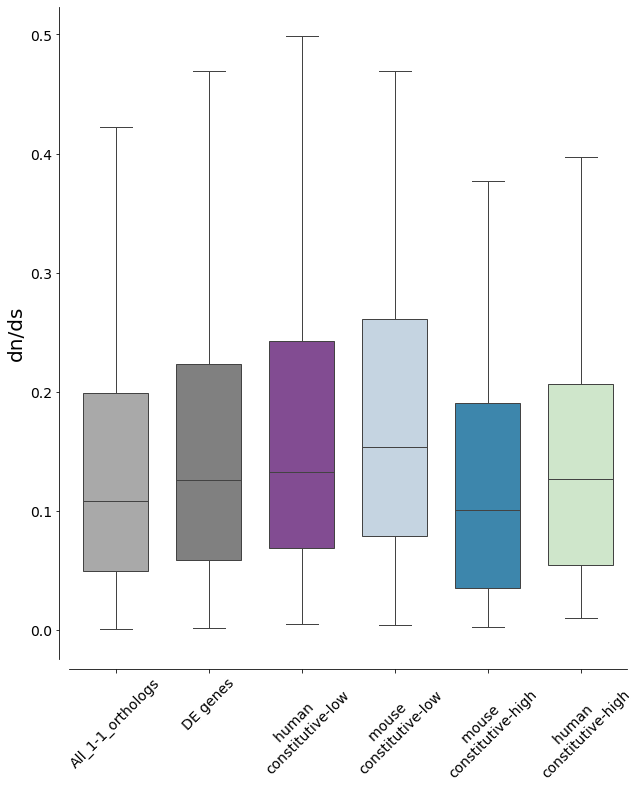

mann DE_PIC_high
MannwhitneyuResult(statistic=140133.0, pvalue=0.11257792236560121)
mann DE_PIC_low
MannwhitneyuResult(statistic=96463.0, pvalue=0.00255002593043862)
mann DE_LF_high
MannwhitneyuResult(statistic=80516.5, pvalue=0.9972631345224309)
mann DE_LF_low
MannwhitneyuResult(statistic=54996.0, pvalue=0.5685100283884033)
FDR
[DE_PIC_high, DE_PIC_low, DE_LF_high, DE_LF_low]
[0.11257792236560121, 0.00255002593043862, 0.9972631345224309, 0.5685100283884033]
[0.22515584 0.0102001  0.99726313 0.75801337]


In [22]:
data=data_to_plot_new.copy()
fig=plt.figure(figsize=(10,12))

my_pal = {"All_1-1_orthologs" :"darkgrey",
    "rest of DE genes": "grey",
              "STIM-high": stim_high_col, "STIM-low": stim_low_col,
          "UNST-high": unst_high_col, "UNST-low": unst_low_col
             }

pvals_for_FDR=[]

ax=sns.boxplot(data=data,order=['All_1-1_orthologs','rest of DE genes','STIM-high','STIM-low','UNST-high','UNST-low'],palette=my_pal,width=0.7,showfliers = False)
# old: sns.boxplot(data=human_mouse_ortho_1_1,x='group',y='p_identity',order=['rest_1_1_orthos','rest_DE_genes','PIC4_high','PIC4_low','LF4_high','LF4_low'],palette='pastel')
sns.despine(offset=10, trim=False,fig=fig)

ax.set_xticklabels(labels=['All_1-1_orthologs','DE genes','human \nconstitutive-low','mouse \nconstitutive-low','mouse \nconstitutive-high','human \nconstitutive-high' ])# old: sns.boxplot(data=human_mouse_ortho_1_1,x='group',y='p_identity',order=['rest_1_1_orthos','rest_DE_genes','PIC4_high','PIC4_low','LF4_high','LF4_low'],palette='pastel')

plt.tick_params(axis='x', which='both', labelsize=14,labelrotation=45)
plt.tick_params(axis='y',labelsize =14)


plt.ylabel('dn/ds',fontsize=20)
plt.savefig(r"C:\Users\TzachiHNB6\Documents\lilach's paper\fig6\figures\dnds.pdf")
plt.savefig(r"C:\Users\TzachiHNB6\Documents\lilach's paper\fig6\figures\dnds.png")

plt.show()

mann_w=scipy.stats.mannwhitneyu(x=data['rest of DE genes'].dropna(), y=data['STIM-high'].dropna(),alternative='less')
#mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='PIC4_high']['p_identity'])
print('mann DE_PIC_high')
print(mann_w)
pvals_for_FDR.append(mann_w[1])


mann_w=scipy.stats.mannwhitneyu(x=data['rest of DE genes'].dropna(), y=data['STIM-low'].dropna(),alternative='less')
#mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='PIC4_low']['p_identity'])
print('mann DE_PIC_low')
print(mann_w)
pvals_for_FDR.append(mann_w[1])



mann_w=scipy.stats.mannwhitneyu(x=data['rest of DE genes'].dropna(), y=data['UNST-high'].dropna(),alternative='less')
#mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='LF4_high']['p_identity'])
print('mann DE_LF_high')
print(mann_w)
pvals_for_FDR.append(mann_w[1])



mann_w=scipy.stats.mannwhitneyu(x=data['rest of DE genes'].dropna(), y=data['UNST-low'].dropna(),alternative='less')
#mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='LF4_low']['p_identity'])
print('mann DE_LF_low')
print(mann_w)
pvals_for_FDR.append(mann_w[1])


# when we had the 1-1 orthos inside.... 
####mann_w=scipy.stats.mannwhitneyu(x=data['rest_1_1_orthos'].dropna(), y=data['rest_DE_genes'].dropna(),alternative='greater')
#mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='LF4_low']['p_identity'])
####print('mann DE_nonDE(all)')
####print(mann_w)


print('FDR')
print('[DE_PIC_high, DE_PIC_low, DE_LF_high, DE_LF_low]')
print(pvals_for_FDR)
from statsmodels.stats.multitest import fdrcorrection
rejected, qvalue = fdrcorrection(pvals_for_FDR,method='indep')
print(qvalue)
